In [47]:
## importing packages
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_book = pd.read_csv('../data/top_books.csv')
df_book = df_book.drop(df_book.columns[0], axis =1)
df_book

,Book,Author,Original_Language,First_Published,Approximate_Sales,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6
0,A Tale of Two Cities,Charles Dickens,English,1859,200000000,Historical fiction,NaN,NaN,NaN,NaN,NaN
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200000000,Fantasy,children's fiction,NaN,NaN,NaN,NaN
2,The Alchemist (O Alquimista),Paulo Coelho,Portuguese,1988,150000000,Fantasy,NaN,NaN,NaN,NaN,NaN
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120000000,Fantasy,children's fiction,NaN,NaN,NaN,NaN
4,And Then There Were None,Agatha Christie,English,1939,100000000,Mystery,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
161,Bridget Jones's Diary,Helen Fielding,English,1996,10000000,NaN,NaN,NaN,NaN,NaN,NaN
162,It Ends with Us,Colleen Hoover,English,2016,10000000,Romance,Fiction,NaN,NaN,NaN,NaN
163,"The Lion, the Witch and the Wardrobe",C.S. Lewis,English,1950,85000000,Fantasy,children's fiction,NaN,NaN,NaN,NaN
164,"The Secret Diary of Adrian Mole, Aged 13¾",Sue Townsend,English,1982,20000000,Young adult novel,NaN,NaN,NaN,NaN,NaN


In [149]:
df_book.find_all(r'\bChildren\b')
# df_book["Age_Category"] = 

AttributeError: 'DataFrame' object has no attribute 'find_all'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Czech'),
  Text(2, 0, 'Dutch'),
  Text(3, 0, 'English'),
  Text(4, 0, 'French'),
  Text(5, 0, 'German'),
  Text(6, 0, 'Gujarati'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Japanese'),
  Text(9, 0, 'Norwegian'),
  Text(10, 0, 'Portuguese'),
  Text(11, 0, 'Russian'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Swedish'),
  Text(14, 0, 'Yiddish')])

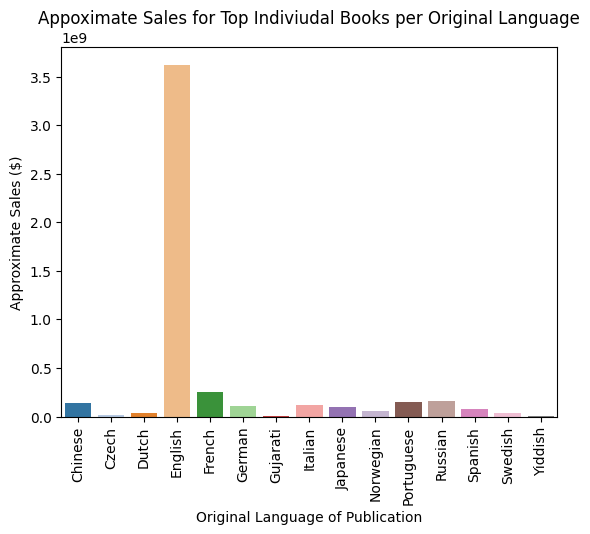

In [ ]:
grouped_sales_language = df_book.groupby("Original_Language").sum()
sns.barplot(grouped_sales_language, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette= "tab20", legend = False, errorbar=None).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales for Top Indiviudal Books per Original Language")

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Czech'),
  Text(2, 0, 'Dutch'),
  Text(3, 0, 'English'),
  Text(4, 0, 'French'),
  Text(5, 0, 'German'),
  Text(6, 0, 'Gujarati'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Japanese'),
  Text(9, 0, 'Norwegian'),
  Text(10, 0, 'Portuguese'),
  Text(11, 0, 'Russian'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Swedish'),
  Text(14, 0, 'Yiddish')])

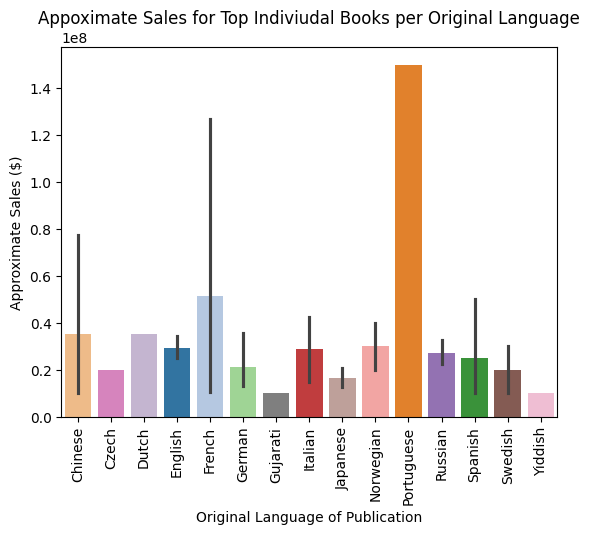

In [140]:
sns.barplot(df_book, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette= "tab20", legend = False, order = df_book.sort_values("Original_Language").Original_Language ).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales for Top Indiviudal Books per Original Language")

plt.xticks(rotation=90)

(array([45., 22., 31., 11.,  2., 11.,  6.,  8.,  2.,  1., 13.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  4.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([1.000e+07, 1.380e+07, 1.760e+07, 2.140e+07, 2.520e+07, 2.900e+07,
        3.280e+07, 3.660e+07, 4.040e+07, 4.420e+07, 4.800e+07, 5.180e+07,
        5.560e+07, 5.940e+07, 6.320e+07, 6.700e+07, 7.080e+07, 7.460e+07,
        7.840e+07, 8.220e+07, 8.600e+07, 8.980e+07, 9.360e+07, 9.740e+07,
        1.012e+08, 1.050e+08, 1.088e+08, 1.126e+08, 1.164e+08, 1.202e+08,
        1.240e+08, 1.278e+08, 1.316e+08, 1.354e+08, 1.392e+08, 1.430e+08,
        1.468e+08, 1.506e+08, 1.544e+08, 1.582e+08, 1.620e+08, 1.658e+08,
        1.696e+08, 1.734e+08, 1.772e+08, 1.810e+08, 1.848e+08, 1.886e+08,
        1.924e+08, 1.962e+08, 2.000e+08]),
 <BarContainer object of 50 artists>)

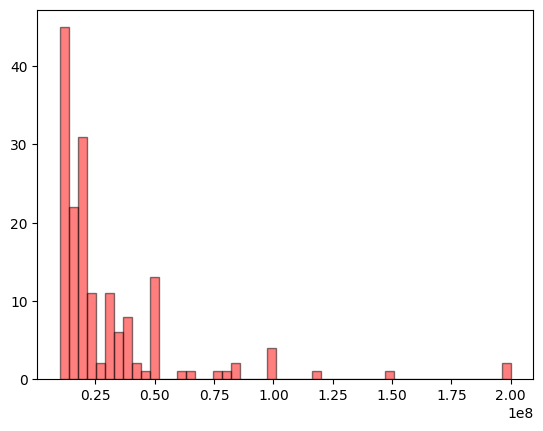

In [50]:
plt.hist(df_book['Approximate_Sales'], bins=50,
          color='red', edgecolor='black', alpha = 0.5)

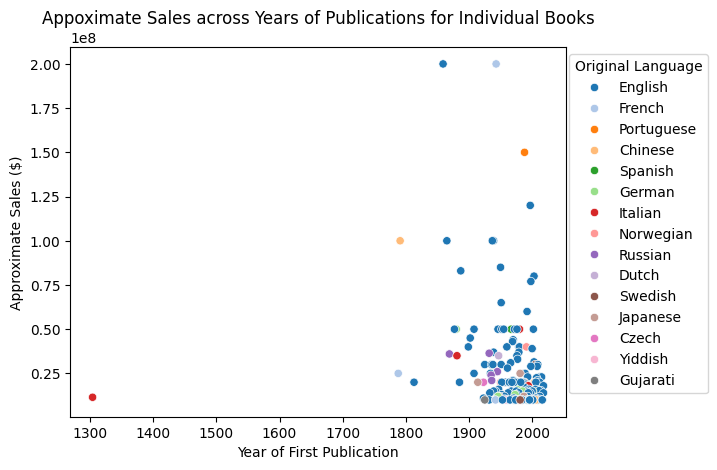

In [110]:
#sns.set_palette("rocket", as_cmap=True)
ax = sns.scatterplot(data=df_book, y="Approximate_Sales", x="First_Published", 
            hue="Original_Language", palette = "tab20").set(
                xlabel = "Year of First Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales across Years of Publications for Individual Books"
                )
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title = "Original Language")

In [45]:
df_series = pd.read_csv('../data/top_series.csv')
df_series = df_series.drop(df_series.columns[0], axis =1)
df_series

,Book_Series,Author,Original_Language,No_of_Installments,Years_of_Publication,Approximate_Sales,Genre_1,Genre_2,First_Installment_Published,Last_Installment_Published,No_of_Main_Books,No_of_Extras,Extras
0,Harry Potter,J. K. Rowling,English,7 + 3 companion books + 4 scripts,1997–2007,600000000,NaN,NaN,1997,2007,7.0,7.0,True
1,Goosebumps,R. L. Stine,English,62 + spin-off series,1992–2025,400000000,NaN,NaN,1992,2025,62.0,NaN,True
2,Perry Mason,Erle Stanley Gardner,English,82 + 4 short stories,1933–1973,300000000,NaN,NaN,1933,1973,82.0,4.0,True
3,Diary of a Wimpy Kid,Jeff Kinney,English,19 + 5 spin-offs,2007–2025,290000000,NaN,NaN,2007,2025,19.0,5.0,True
4,Berenstain Bears,Stan and Jan Berenstain,English,428,1962–2025,260000000,NaN,NaN,1962,2025,428.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Horrible Histories,Terry Deary,English,24,1993–2025,20000000,NaN,NaN,1993,2025,24.0,NaN,False
124,Rainbow Magic,Daisy Meadows,English,80,2003–2025,20000000,NaN,NaN,2003,2025,80.0,NaN,False
125,Morgan Kane,Louis Masterson,Norwegian,90,1966-2025,20000000,NaN,NaN,1966,2025,90.0,NaN,False
126,The Southern Vampire Mysteries,Charlaine Harris,English,13,2001–2013,20000000,NaN,NaN,2001,2013,13.0,NaN,False


(array([45., 19., 11.,  5.,  4.,  8.,  3.,  4.,  5.,  3.,  0.,  3.,  3.,
         1.,  2.,  5.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.500e+07, 2.670e+07, 3.840e+07, 5.010e+07, 6.180e+07, 7.350e+07,
        8.520e+07, 9.690e+07, 1.086e+08, 1.203e+08, 1.320e+08, 1.437e+08,
        1.554e+08, 1.671e+08, 1.788e+08, 1.905e+08, 2.022e+08, 2.139e+08,
        2.256e+08, 2.373e+08, 2.490e+08, 2.607e+08, 2.724e+08, 2.841e+08,
        2.958e+08, 3.075e+08, 3.192e+08, 3.309e+08, 3.426e+08, 3.543e+08,
        3.660e+08, 3.777e+08, 3.894e+08, 4.011e+08, 4.128e+08, 4.245e+08,
        4.362e+08, 4.479e+08, 4.596e+08, 4.713e+08, 4.830e+08, 4.947e+08,
        5.064e+08, 5.181e+08, 5.298e+08, 5.415e+08, 5.532e+08, 5.649e+08,
        5.766e+08, 5.883e+08, 6.000e+08]),
 <BarContainer object of 50 artists>)

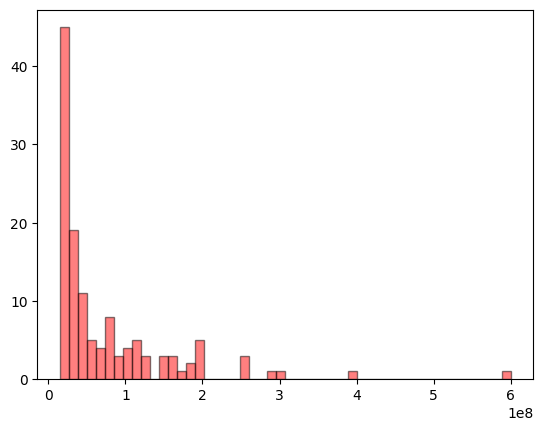

In [46]:
plt.hist(df_series['Approximate_Sales'], bins=50,
          color='red', edgecolor='black', alpha = 0.5)

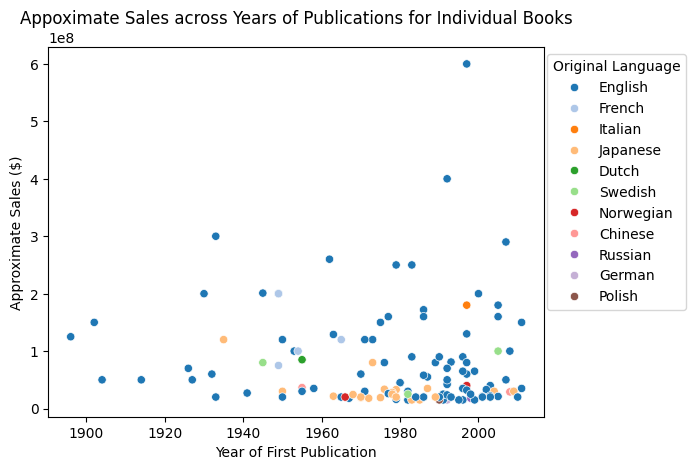

In [ ]:
ax = sns.scatterplot(data=df_series, y="Approximate_Sales", x="First_Installment_Published", 
            hue="Original_Language", palette = "tab20").set(
                xlabel = "Year of First Installment Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales across Years of Publications for Individual Books"
                )
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title = "Original Language")

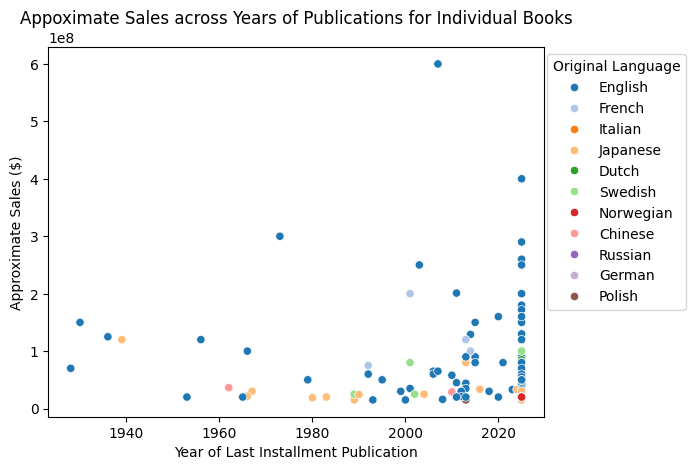

In [112]:
ax = sns.scatterplot(data=df_series, y="Approximate_Sales", x="Last_Installment_Published", 
            hue="Original_Language", palette = "tab20").set(
                xlabel = "Year of Last Installment Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales across Years of Publications for Individual Books"
                )
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title = "Original Language")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Dutch'),
  Text(2, 0, 'English'),
  Text(3, 0, 'French'),
  Text(4, 0, 'German'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Japanese'),
  Text(7, 0, 'Norwegian'),
  Text(8, 0, 'Polish'),
  Text(9, 0, 'Russian'),
  Text(10, 0, 'Swedish')])

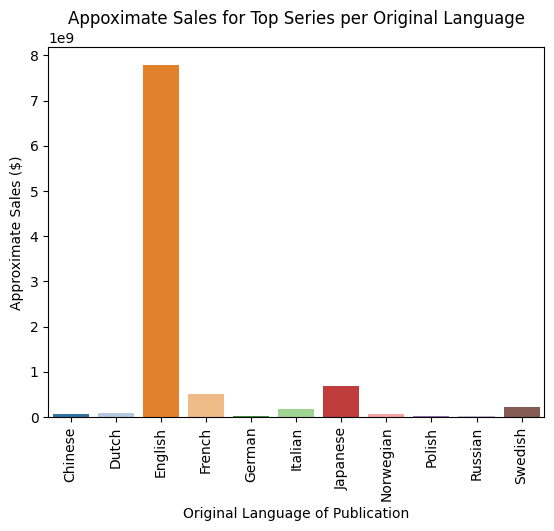

In [132]:
grouped_sales_language = df_series.groupby("Original_Language").sum()
sns.barplot(grouped_sales_language, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette= "tab20", legend = False, errorbar=None).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales for Top Series per Original Language")

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Dutch'),
  Text(2, 0, 'English'),
  Text(3, 0, 'French'),
  Text(4, 0, 'German'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Japanese'),
  Text(7, 0, 'Norwegian'),
  Text(8, 0, 'Polish'),
  Text(9, 0, 'Russian'),
  Text(10, 0, 'Swedish')])

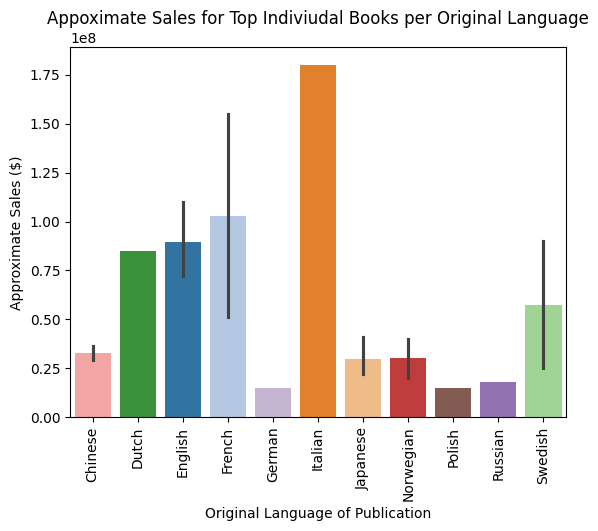

In [142]:
sns.barplot(df_series, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette= "tab20", legend = False, order = df_series.sort_values("Original_Language").Original_Language ).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales for Top Indiviudal Books per Original Language")

plt.xticks(rotation=90)